# Regression, Prediction Car Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # Uyarıları gözardı etmek için
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cars.xls")

# EDA- Exploraty Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [8]:
df.sample(7)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
697,28054.982362,26276,SAAB,9_5,Arc Sedan 4D,Sedan,4,2.3,4,1,1,1
549,13162.852054,24542,Pontiac,Grand Am,SE Sedan 4D,Sedan,4,2.2,4,0,1,1
322,15084.815404,14824,Chevrolet,Cobalt,LT Sedan 4D,Sedan,4,2.2,4,1,1,1
265,13688.000109,18766,Chevrolet,Cavalier,LS Sport Sedan 4D,Sedan,4,2.2,4,1,1,1
363,19409.752607,18795,Chevrolet,Impala,LS Sedan 4D,Sedan,6,3.8,4,1,1,1
115,37215.169383,22211,Cadillac,Deville,DTS Sedan 4D,Sedan,8,4.6,4,1,0,1
208,9789.037676,22986,Chevrolet,AVEO,SVM Hatchback 4D,Hatchback,4,1.6,4,0,1,1


In [9]:
abs(df.corr()["Price"]).sort_values(ascending=False) #false sorts from largest to smallest
#Price then we sort of connection to the other columns. 

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotpib inline


UsageError: Line magic function `%matplotpib` not found.


<AxesSubplot:>

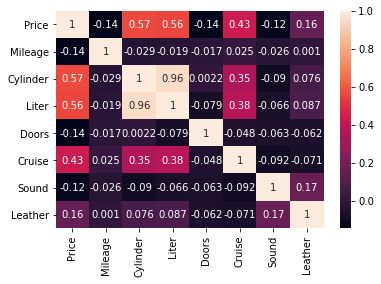

In [11]:
sns.heatmap(df.corr(),annot=True) # We can see numbers with annot=True 

### We only got corr between 20 and 90 percent . 
### Because under 20 is too low for correlation and over 90 is too much correlation

In [13]:
x=df[["Mileage","Cylinder","Liter","Cruise"]]

In [14]:
x

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1
...,...,...,...,...
799,16229,6,3.0,1
800,19095,6,3.0,1
801,20484,6,3.0,1
802,25979,6,3.0,1


In [15]:
x.head()

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1


In [16]:
y=df[["Price"]] 

In [17]:
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [18]:
x.shape

(804, 4)

In [19]:
y.shape

(804, 1)

In [20]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


# TRAIN_TEST_SPLIT

In [21]:
from sklearn.linear_model import LinearRegression #SKLEARN= science Kit Learn
from sklearn.model_selection import train_test_split #for seperate datas as train-test 


In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)
print ('Values in x_train',x_train)
print ('Values in y_train',y_train)

Values in x_train      Mileage  Cylinder  Liter  Cruise
117    26250         8    4.6       1
308    29891         4    2.2       1
570     1592         6    3.8       1
604    19894         4    1.8       1
206    20836         4    1.6       1
..       ...       ...    ...     ...
742    21616         4    2.5       1
528    35624         6    3.5       1
74     17335         6    3.8       1
176    19945         4    1.6       0
338    26204         4    2.2       0

[643 rows x 4 columns]
Values in y_train             Price
117  36245.158228
308  12684.986227
570  19822.115392
604  17325.269543
206   9720.978890
..            ...
742  23274.480711
528  16216.980706
74   26190.271468
176  11215.018647
338  12495.970751

[643 rows x 1 columns]


In [23]:
x_train.shape , x_test.shape , y_train.shape ,y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

# Train

In [24]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train) 

# Predict

In [25]:
y_pretest=lr.predict(x_test) 
y_pretest
# 643 data trained with prices --> prediction with 161 test data.

array([[11148.62940387],
       [25662.63147418],
       [18279.41766294],
       [11540.73917302],
       [23426.0701786 ],
       [31420.5453541 ],
       [19328.85628173],
       [24773.25185754],
       [29200.32466335],
       [11183.31863407],
       [24299.55929987],
       [20538.26465205],
       [17881.31995338],
       [26696.26797506],
       [24162.40088302],
       [20818.88388614],
       [11374.10940017],
       [24693.41195717],
       [24567.80942355],
       [30460.75963077],
       [20163.65672799],
       [18471.51729144],
       [18182.01235844],
       [30285.16775419],
       [24998.35059689],
       [23758.4680427 ],
       [12176.58918638],
       [17891.15452895],
       [24576.53671008],
       [13871.91278504],
       [12783.85110583],
       [23880.42757003],
       [19007.58027511],
       [24351.9507661 ],
       [25304.65292335],
       [15315.44966857],
       [34075.70194812],
       [26798.72130862],
       [29833.85014066],
       [11163.64948293],


In [26]:
from sklearn.metrics import mean_squared_error,r2_score 
# mean_squared_error count of errors , r2_score ise  success rate
# if r2_score is over %80 the model is successfull.

In [27]:
(mean_squared_error(y_test,y_pretest))**0.5 

8036.440424336674

In [28]:
r2_score(y_test, y_pretest) 

0.45340342779819476

In [30]:
x, y= df[['Mileage','Cylinder','Cruise','Make','Trim']],df[['Price']]

In [31]:
x.head()

,Mileage,Cylinder,Cruise,Make,Trim
0,8221,6,1,Buick,Sedan 4D
1,9135,6,1,Buick,Sedan 4D
2,13196,6,1,Buick,Sedan 4D
3,16342,6,1,Buick,Sedan 4D
4,19832,6,1,Buick,Sedan 4D


In [32]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [33]:
x=pd.get_dummies(x,drop_first=True) 

In [34]:
x.sample(20)

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
772,17139,4,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
316,21611,4,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
212,19183,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
757,26034,4,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
578,27800,6,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
737,25357,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
708,26503,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,25247,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,10986,6,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
493,18419,6,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
x.describe()

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,0.752488,0.099502,0.398010,0.186567,0.141791,0.074627,0.012438,0.024876,...,0.024876,0.024876,0.012438,0.012438,0.012438,0.012438,0.012438,0.211443,0.012438,0.012438
std,8196.319707,1.387531,0.431836,0.299522,0.489792,0.389806,0.349053,0.262952,0.110898,0.155843,...,0.155843,0.155843,0.110898,0.110898,0.110898,0.110898,0.110898,0.408586,0.110898,0.110898
min,266.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14623.500000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20913.500000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25213.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50387.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=13) #train_size=0.8

# LINEAR REGRESSION

In [37]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pretest=LR.predict(x_test)
y_pretest

array([[13558.05572679],
       [20804.90573239],
       [16260.39061283],
       [11202.40561356],
       [16915.23646332],
       [28882.41936598],
       [17780.83278566],
       [33481.25536638],
       [62738.03312135],
       [11447.83212168],
       [17541.84017052],
       [14136.15852088],
       [11141.60721064],
       [22902.5004862 ],
       [18570.16974192],
       [19301.79669107],
       [13285.16903258],
       [32626.31777692],
       [19358.72972264],
       [37896.44076888],
       [13065.26121786],
       [30125.48208053],
       [28925.14278566],
       [63845.39997771],
       [20126.83290045],
       [17544.57566239],
       [ 9803.51337907],
       [10745.57679762],
       [18919.45474455],
       [13763.6777446 ],
       [12331.46980392],
       [22349.98829725],
       [33227.60519463],
       [19011.76156563],
       [20630.67679774],
       [15311.02284533],
       [31592.7029411 ],
       [60286.56711708],
       [39114.74358229],
       [11073.02201494],


In [39]:
(mean_squared_error(y_test,y_pretest))**0.5

2373.589764965421

In [40]:
r2_score(y_test,y_pretest) #Başarı oranımız çok iyi

0.9563845906257726

# LET'S TRY DIFFERENT ALGORITHMS

## RIDGE

In [42]:
from sklearn.linear_model import Ridge, Lasso #Ridge hataların karesini alıp hataların üzerine yoğunlaşıyor.
#Lasso ise mutlağını alarak

In [43]:
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

In [44]:
y_pred_ridge

array([[13340.30245749],
       [20867.35428463],
       [16737.49466231],
       [11428.87766046],
       [17036.78902086],
       [28316.45489874],
       [18265.32009095],
       [33535.17204601],
       [60027.23663367],
       [11174.3217953 ],
       [17981.00922262],
       [14285.67013982],
       [11280.63227962],
       [23077.19156308],
       [18526.70679835],
       [19790.75962963],
       [13314.63322301],
       [32677.71869197],
       [20126.13467564],
       [38396.65077878],
       [12954.49834661],
       [29923.04258729],
       [28881.59068683],
       [61137.86206044],
       [20187.28613555],
       [17667.98013204],
       [10342.99441682],
       [10627.98795454],
       [18870.51707162],
       [13896.79669799],
       [12443.92649423],
       [22085.76413373],
       [32800.36316233],
       [18979.54332321],
       [20664.990115  ],
       [15487.24967826],
       [31034.71383429],
       [57568.55687319],
       [38972.71277011],
       [11236.77798154],


In [45]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

2292.0933094282746

In [46]:
r2_score(y_test, y_pred_ridge) #Süüüüper

0.9593282163378927

## LASSO

In [47]:
L=Lasso()
L.fit(x_train, y_train)
y_pred_lasso=L.predict(x_test)

In [48]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

2425.7347417125043

In [49]:
r2_score(y_test, y_pred_lasso)

0.9544471820141907

## ELASTIC NET

In [50]:
from sklearn.linear_model import ElasticNet 
E = ElasticNet(l1_ratio=.8)
# ElsasticNet does it by comparing ridge and lasso

In [51]:
E.fit(x_train,y_train) 
y_pred_elastic=E.predict(x_test)

In [52]:
(mean_squared_error(y_test,y_pred_elastic))**0.5 

6136.57583826278

In [53]:
r2_score(y_test,y_pred_elastic) 
# Success rate is down. Elastic Net is not good for us.

0.7084716172183274

## EXTRA TREE REGRESSOR

In [54]:
from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train, y_train)
y_pred_etr= ETR.predict(x_test)

In [55]:
(mean_squared_error(y_test, y_pred_etr))**0.5

2758.022669540178

In [56]:
r2_score(y_test, y_pred_etr)

0.941112340309672

## GRADIENT BOOSTING REGRESSOR ( BETTER FOR THIS PROJECT )

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [58]:
y_pred_gbr=GBR.predict(x_test)

In [59]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

1781.118508769517

In [60]:
r2_score(y_test,y_pred_gbr)

0.9754407972026065

## K NEIGHBORS REGRESSOR

In [61]:
from sklearn.neighbors import KNeighborsRegressor
est=KNeighborsRegressor(n_neighbors=10,weights="uniform")
model=est.fit(x_train,y_train)

In [62]:
y_pred_knb=model.predict(x_test)

In [63]:
(mean_squared_error(y_test,y_pred_knb))**0,5

(1.0, 5)

In [64]:
r2_score(y_test,y_pred_knb)

-0.18214070680081607